<a href="https://colab.research.google.com/github/ramyasnl/Machine_Learning_Beginners_MS/blob/main/LinearPolynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression & Polynomial Regression
## A good Linear Regression model has a HIGH Correlation Coefficient

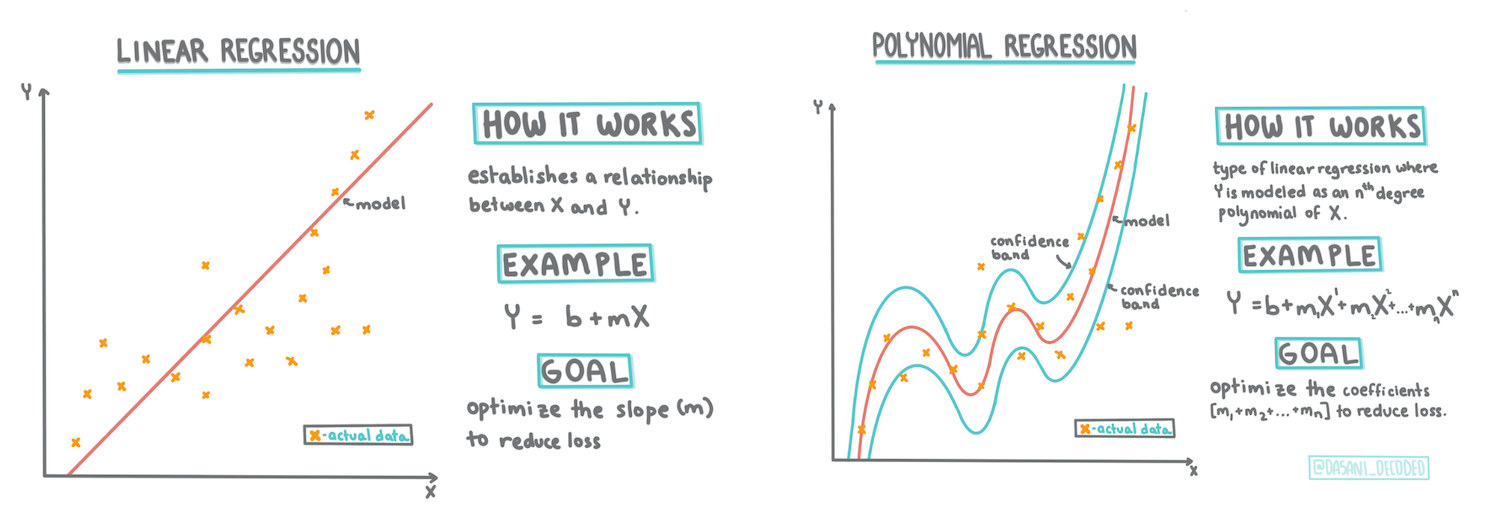

## Pumpkin Pricing
1.Load up required libraries and dataset.</br>
2. Convert the data to a dataframe containing a subset of the data:</br>
3.Only get pumpkins priced by the bushel</br>
4.Convert the date to a month</br>
5.Calculate the price to be an average of high and low prices</br>
6.Convert the price to reflect the pricing by bushel quantity</br>

## Importing the Dependencies And Reading the data from Raw github 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pumpkins = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv', error_bad_lines=False)
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Taking only the pumpkins with package as Bushel .

In [3]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,15.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,18.0,DELAWARE,NaN,sml,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,18.0,DELAWARE,NaN,sml,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,17.0,OHIO,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,15.0,DELAWARE,NaN,NaN,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Taking only needed information from the above dataframe 

In [4]:
new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date', 'City Num', 'Variety Num']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins.head()

,City Name,Package,Variety,Date,Low Price,High Price
70,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,15.0,15.0
71,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,18.0,18.0
72,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,18.0,18.0
73,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,17.0,17.0
74,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/8/16,15.0,15.0


## Averaging the price by price =( low price + high price )/2 & 
## Converting the Date column to only month 

In [5]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0


In [6]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


In [7]:
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Variety     415 non-null    object 
 2   City        415 non-null    object 
 3   Package     415 non-null    object 
 4   Low Price   415 non-null    float64
 5   High Price  415 non-null    float64
 6   Price       415 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 45.9+ KB


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

# Basic Scatter Plot 

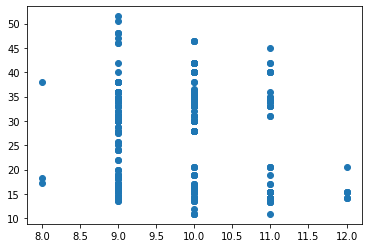

In [8]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

## Correlation
One more term to understand is the Correlation Coefficient between given X and Y variables. Using a scatterplot, you can quickly visualize this coefficient. A plot with datapoints scattered in a neat line have high correlation, but a plot with datapoints scattered everywhere between X and Y have a low correlation.

A good linear regression model will be one that has a high (nearer to 1 than 0) Correlation Coefficient using the Least-Squares Regression method with a line of regression.

✅ Run the notebook accompanying this lesson and look at the City to Price scatterplot. Does the data associating City to Price for pumpkin sales seem to have high or low correlation, according to your visual interpretation of the scatterplot?

In [9]:
new_pumpkins.corr()

,Month,Low Price,High Price,Price
Month,1.000000,-0.024604,-0.043857,-0.148783
Low Price,-0.024604,1.000000,0.956601,0.353216
High Price,-0.043857,0.956601,1.000000,0.385792
Price,-0.148783,0.353216,0.385792,1.000000


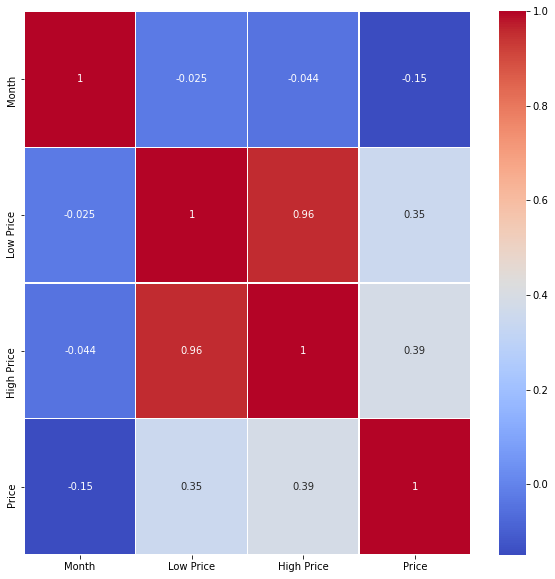

In [10]:
import seaborn as sns
# Exploratory Plot of Data using heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(new_pumpkins.corr(),cmap='coolwarm', annot = True, linewidths=.2)
plt.show()

## Prepare your data for regression
Now that you have an understanding of the math behind this exercise, create a Regression model to see if you can predict which package of pumpkins will have the best pumpkin prices. Someone buying pumpkins for a holiday pumpkin patch might want this information to be able to optimize their purchases of pumpkin packages for the patch.


Since you'll use Scikit-learn, there's no reason to do this by hand (although you could!). In the main data-processing block of your lesson notebook, add a library from Scikit-learn to automatically convert all string data to numbers:

In [11]:
from sklearn.preprocessing import LabelEncoder

new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Variety     415 non-null    int64  
 2   City        415 non-null    int64  
 3   Package     415 non-null    int64  
 4   Low Price   415 non-null    int64  
 5   High Price  415 non-null    int64  
 6   Price       415 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 45.9 KB


## Finding the correlation now  and plotting the heat map 


In [12]:
new_pumpkins.corr()

,Month,Variety,City,Package,Low Price,High Price,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.002930,-0.028949,-0.148783
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.073349,-0.107464,-0.863479
City,-0.188728,-0.248441,1.000000,0.301604,0.172619,0.218157,0.323640
Package,-0.144847,-0.614855,0.301604,1.000000,0.320235,0.384265,0.606171
Low Price,-0.002930,-0.073349,0.172619,0.320235,1.000000,0.918809,0.322444
High Price,-0.028949,-0.107464,0.218157,0.384265,0.918809,1.000000,0.371248
Price,-0.148783,-0.863479,0.323640,0.606171,0.322444,0.371248,1.000000


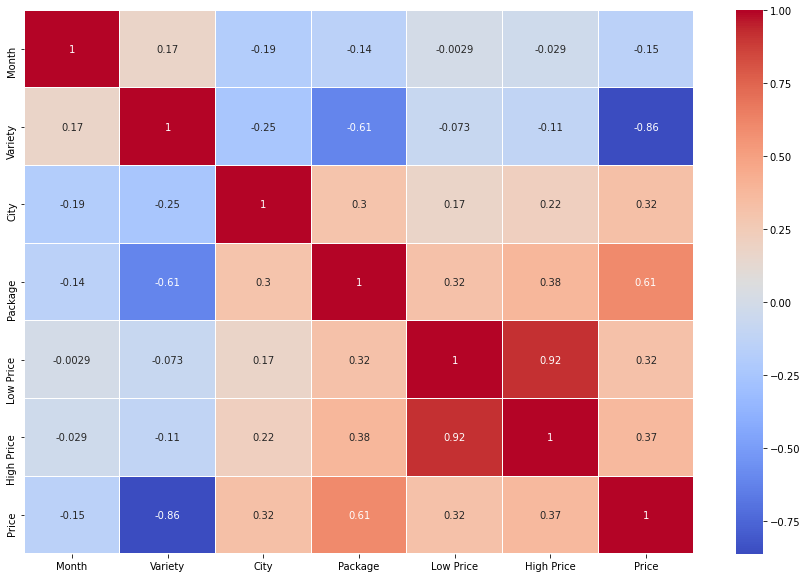

In [13]:
# Exploratory Plot of Data using heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(new_pumpkins.corr(),cmap='coolwarm', annot = True, linewidths=.2)
plt.show()

Try to find a good correlation between two points of your data to potentially build a good predictive model. As it turns out, there's only weak correlation between the City and Price:

print(new_pumpkins['City'].corr(new_pumpkins['Price'])) is
0.32363971816089226
However there's a bit better correlation between the Package and its Price. That makes sense, right? Normally, the bigger the produce box, the higher the price.

print(new_pumpkins['Package'].corr(new_pumpkins['Price'])) is
0.6061712937226021
A good question to ask of this data will be: 'What price can I expect of a given pumpkin package?'

Let's build this regression model

## Building a linear model
Before building your model, do one more tidy-up of your data.
### Drop any null data and check once more what the data looks like.

In [14]:
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Variety     415 non-null    int64  
 2   City        415 non-null    int64  
 3   Package     415 non-null    int64  
 4   Low Price   415 non-null    int64  
 5   High Price  415 non-null    int64  
 6   Price       415 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 25.9 KB


In [15]:
## Create a new dataframe from this minimal set and print it out:
new_columns = ['Package', 'Price']
lin_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

lin_pumpkins

,Package,Price
70,0,13.636364
71,0,16.363636
72,0,16.363636
73,0,15.454545
74,0,13.636364
...,...,...
1738,2,30.000000
1739,2,28.750000
1740,2,25.750000
1741,2,24.000000


## Assigning the X & y values

In [16]:
X = lin_pumpkins.values[:, :1]
y = lin_pumpkins.values[:, 1:2]

## Applying the Machine Learning Model 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.3315342327998989


## Visualizing the results 


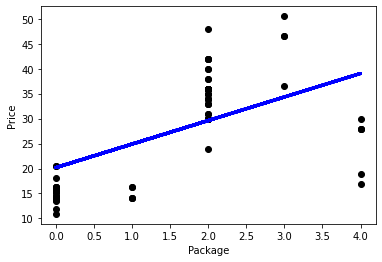

In [18]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.show()

In [19]:
# Test the model against a hypothetical variety:

lin_reg.predict( np.array([ [2.75] ]) )

array([[33.15655975]])


The returned price for this mythological Variety is: array([[33.15655975]])
That number makes sense, if the logic of the regression line holds true.

🎃 Congratulations, we just created a model that can help predict the price of a few varieties of pumpkins. Our holiday pumpkin patch will be beautiful. But we can probably create a better model!

## Polynomial regression
Another type of linear regression is polynomial regression. While sometimes there's a linear relationship between variables - the bigger the pumpkin in volume, the higher the price - sometimes these relationships can't be plotted as a plane or straight line.

✅ Here are some more examples of data that could use polynomial regression

Take another look at the relationship between **Variety to Price** in the previous plot. Does this scatterplot seem like it should necessarily be analyzed by a straight line? Perhaps not. In this case, you can try polynomial regression.

✅ Polynomials are mathematical expressions that might consist of one or more variables and coefficients

### Polynomial regression creates a curved line to better fit nonlinear data.

Let's recreate a dataframe populated with a segment of the original pumpkin data:

In [20]:
new_columns = ['Variety', 'Package', 'City', 'Month', 'Price']
poly_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

poly_pumpkins

,Month,Variety,City,Package,Price
70,1,3,1,0,13.636364
71,1,3,1,0,16.363636
72,2,3,1,0,16.363636
73,2,3,1,0,15.454545
74,2,3,1,0,13.636364
...,...,...,...,...,...
1738,1,1,9,2,30.000000
1739,1,1,9,2,28.750000
1740,1,1,9,2,25.750000
1741,1,1,9,2,24.000000


In [22]:
## Use the Background_gradient() method with coolwarm as its argument value:
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

,Month,Variety,City,Package,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.148783
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.863479
City,-0.188728,-0.248441,1.000000,0.301604,0.323640
Package,-0.144847,-0.614855,0.301604,1.000000,0.606171
Price,-0.148783,-0.863479,0.323640,0.606171,1.000000


<Figure size 1080x720 with 0 Axes>

## Create a pipeline
Scikit-learn includes a helpful API for building polynomial regression models - the make_pipeline API. A 'pipeline' is created which is a chain of estimators. In this case, the pipeline includes polynomial features, or predictions that form a nonlinear path.

## 1.Build out the X and y columns:

In [29]:
X=poly_pumpkins.iloc[:,3:4].values
y=poly_pumpkins.iloc[:,4:5].values
X
y

array([[13.63636364],
       [16.36363636],
       [16.36363636],
       [15.45454545],
       [13.63636364],
       [16.36363636],
       [15.45454545],
       [16.13636364],
       [13.63636364],
       [15.45454545],
       [16.13636364],
       [13.63636364],
       [15.45454545],
       [16.13636364],
       [13.63636364],
       [15.        ],
       [15.45454545],
       [16.36363636],
       [14.54545455],
       [16.36363636],
       [14.54545455],
       [14.54545455],
       [14.54545455],
       [36.        ],
       [30.        ],
       [36.        ],
       [30.        ],
       [34.        ],
       [30.        ],
       [33.        ],
       [33.        ],
       [34.        ],
       [30.        ],
       [30.        ],
       [33.        ],
       [34.        ],
       [30.        ],
       [30.        ],
       [33.        ],
       [34.        ],
       [32.        ],
       [30.        ],
       [33.        ],
       [34.        ],
       [33.        ],
       [36

In [24]:
# Create the pipeline by calling the make_pipeline() method:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(np.array(X_train), y_train)

y_pred=pipeline.predict(X_test)

## Create a sequence
At this point, you need to create a new dataframe with sorted data so that the pipeline can create a sequence.

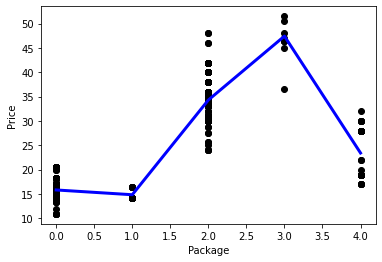

In [25]:
df = pd.DataFrame({'x': X_test[:,0], 'y': y_pred[:,0]})
df.sort_values(by='x',inplace = True)
points = pd.DataFrame(df).to_numpy()

plt.plot(points[:, 0], points[:, 1],color="blue", linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.scatter(X,y, color="black")
plt.show()

In [26]:
accuracy_score = pipeline.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.8537946517073784


## Do a prediction
Can we input a new value and get a prediction?

In [27]:
pipeline.predict( np.array([ [2.75] ]) )

array([[46.34509342]])

It does make sense, given the plot! And, if this is a better model than the previous one, looking at the same data, you need to budget for these more expensive pumpkins!

🏆 Well done! We have created two regression models in one lesson. In the final section on regression, you will learn about logistic regression to determine categories.